In [ ]:
what_we_will_cover = {
    1: 'data (prepare and load)',
    2: 'build model',
    3: 'fitting the model to data (training)',
    4: 'making predictions and evaluating a model (inference)',
    5: 'saving and loading a model',
    6: 'putting it all together'
}

what_we_will_cover

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for NN
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

## 1. Data (preparing and loading)

Machine Learning (same for Deep Learning) is a game of two parts:
* Get data into numerical representation
* Build a model to learn patterns in that numerical representation

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

# create some data

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
print(len(X))
print(len(y))

50
50


In [ ]:
X.dim()

2

### Splitting data into training and test sets

In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how we might we better visualize our data.

Our motto > Visualize, Visualize, Visualize

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compare predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # are there predictons?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 10})

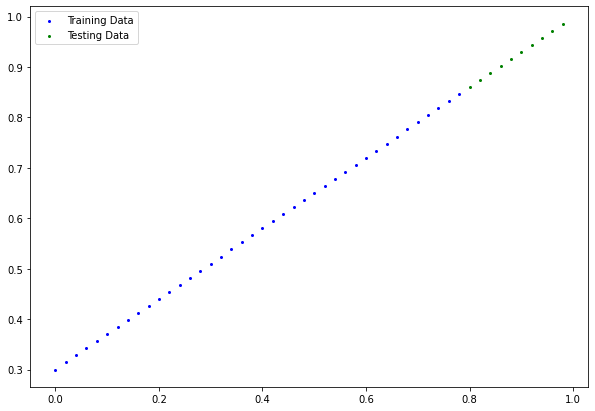

In [ ]:
plot_predictions()

## 2. Build the model

nn.Parameters >> A module can have one or more Parameters (its weights and bise) instances as attributes, which are tensors.

https://androidkt.com/what-is-pytorch-nn-parameters/

There are two main algorithms you need to pay attention to:
* Gradient Descent
* Backpropagation

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                                requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                            requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
## -> is just an annotation in python functions

def velocity(s,t) -> 'mph':
  return(s/t)

In [ ]:
velocity(90, 2)

45.0

In [ ]:
velocity.__annotations__

{'return': 'mph'}

In [ ]:
def velocity(s: 'in miles',t: 'in hours') -> 'mph':
  return(s/t)

In [ ]:
velocity.__annotations__

{'s': 'in miles', 't': 'in hours', 'return': 'mph'}

### PyTorch model building essentials

1. `torch.nn` - contains all of the buildings for computational graph (a NN can be considered a computational graph)
*torch.nn provide us many more classes and modules to implement and train the neural network.*
2. `torch.nn.Parameter` - what parameters should our model try and learn, often PyTorch layer from `torch.nn` will set these for us
3. `torch.nn.Module` - the base class for all NN modules
4. `torch.optim` - this where the optimizers in PyTorch live, they will help with Gradient Descent
5. `forward()` - all nn.Module subclasses require you to overwrite forward(), this methods defines what happens in the forward computation

PyTorch Cheat Sheet
https://pytorch.org/tutorials/beginner/ptcheat.html

torch.nn in PyTorch
https://www.javatpoint.com/torch_nn-in-pytorch


### Checking the contents of the PyTorch model

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [ ]:
print(X_test),
print("\n", y_test)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

 tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [ ]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# make predictions with model
# want to make your inference code in PyTorch run faster > run torch.inference_mode() context manager
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

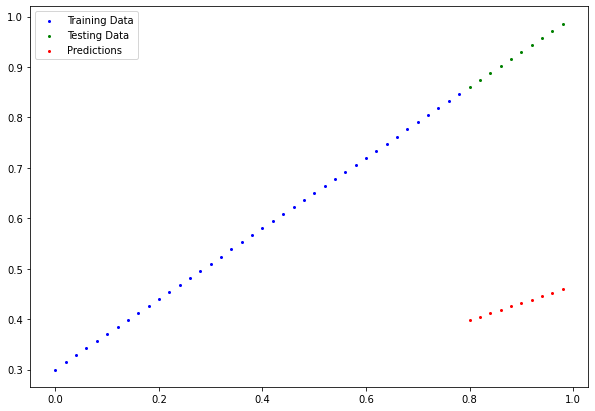

In [ ]:
plot_predictions(predictions=y_pred)

## 3. Train Model

The whole idea of training is for a model to move from poor represetation (*unkown* parameters) to a better representation (*known parameters*)

loss function == cost function == criterion

**Loss Function** is a function to measure how wrong/bad your model's predicitions are to the ideal outputs 

Lower is Better

**Optimizer** takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias) to improve the loss function

Specifically for PyTorch, we need:
  * a training loop
  * a testing loop

In [ ]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup loss function
loss_fn = nn.L1Loss()

# setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr means learning rate (possibly th most important hyperparameter you can set)
                            

### Building a trainin loop (and a testing loop) in PyTorch

0. Loop through the data and do ...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make prediction on data - also forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data ...
epoches = 100

# Track experiments
## Track different values, if I want to try another model and compare it with the current one
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epoches):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all paramaters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # input (y_pred) first, target or label data (y_train) second
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/ batch norm)
  with torch.inference_mode(): # turns off gradient tracking
  # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}") 
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

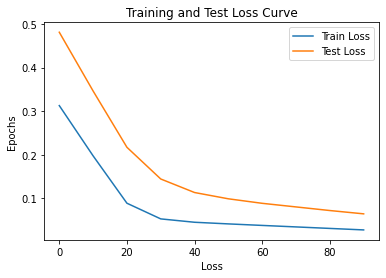

In [ ]:
import numpy as np

# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curve")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend()

In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every `loss.backward()` call.

Because of this, when you start your training loop, ideally you should **zero out the gradients** so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters, and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

In [ ]:
## New Predictions
with torch.inference_mode():
  y_pred_new = model_0(X_test)

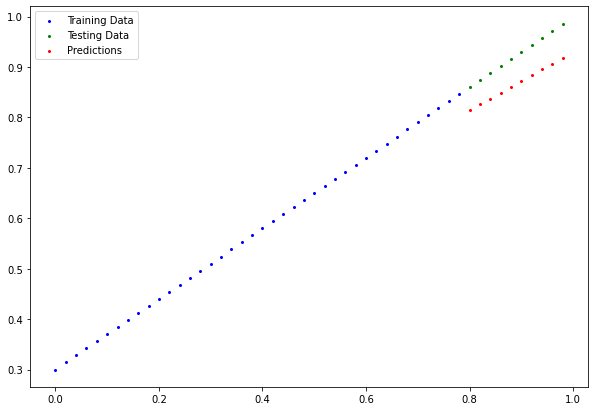

In [ ]:
plot_predictions(predictions=y_pred_new)

## 3. Saving and Loading a Model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch:
1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary 

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# save our PyTorch model
from pathlib import Path

# 1. create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. saving the model by state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


A common PyTorch convention is to save models using either a *.pt* or *.pth* file extension 

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Dec 18 05:27 01_pytorch_workflow_model_0.pth


Since we saved our model's `state_dict()` rather the enitre model, we will create a new instance of our model class and load the saved `state_dict()` into that 

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved stat_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) 

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

## Putting Everything Together

In [ ]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'1.13.0+cu116'

Create device-agnostic code

In [ ]:
# setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 1. Data

In [ ]:
### same as previous section, Data (preparing and loading) 

### 2. Building PyTorch Linear model

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # because we have 1 i/p which is X, and 1 o/p which is y
  
  def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
X_train[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [ ]:
y_train[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For Training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
## same code as previous section

## Saving and Loading a trained model

In [ ]:
## same code as previous section